<a href="https://colab.research.google.com/github/afrahhassan/afrahhassan/blob/main/assignment2_susan.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>



---
# <div align="center"><font>  </font></div>
# <div align="center"><font> COSC 2793 Computational Machine Learning </font></div>
## <div align="center"> <font> Assignment 2: Machine Learning Project </font></div>
## <div align="center"> <font> S3930776 Afrah Hassan A Alshaikh Ali & S3569266 Chang Su </font></div>
---

- 1. Load Data into DataFrame (shape_df, type_df)
- 2. check the dataset
- 3. encode the labels
- 4. rescale & data format
- 5. split data
- 6. flatten
- 7. Basline models (X_train flattened, y_train_one-encoded)
- 8. CNN model
- 9. Data Augmentation
- 10. Check the performance


In [ ]:
#Import Libraries


In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
!cp -r "/content/drive/MyDrive/Assignment2" .

# **1. Data Loading and Prepocessing**

## **1.1 Load the dataset**

In [ ]:
import os
import cv2
import pandas as pd

def load_images_into_dataframes(data_dir):
    shape_data = []
    type_data = []

    # Iterate through shape folders
    for shape_folder in os.listdir(data_dir):
        shape_folder_path = os.path.join(data_dir, shape_folder)

        # Skip non-directory files
        if not os.path.isdir(shape_folder_path):
            continue

        # Iterate through sign type folders
        for sign_type_folder in os.listdir(shape_folder_path):
            sign_type_folder_path = os.path.join(shape_folder_path, sign_type_folder)

            # Skip non-directory files
            if not os.path.isdir(sign_type_folder_path):
                continue

            # Iterate through image files
            for image_file in os.listdir(sign_type_folder_path):
                image_path = os.path.join(sign_type_folder_path, image_file)

                # Check if the file is an image
                if not image_path.endswith(('.jpg', '.jpeg', '.png', '.bmp', '.gif')):
                    print(f"Skipping non-image file: {image_path}")
                    continue

                # Load the image
                image = cv2.imread(image_path, cv2.IMREAD_GRAYSCALE)

                # Check if the image is null
                if image is None:
                    print(f"Skipping null image: {image_path}")
                    continue

                # Append image and labels to the respective data lists
                shape_data.append((image_path, image, shape_folder))
                type_data.append((image_path, image, sign_type_folder))

    # Create DataFrames from the collected data
    shape_df = pd.DataFrame(shape_data, columns=['image_path', 'image', 'shape_label'])
    type_df = pd.DataFrame(type_data, columns=['image_path', 'image', 'type_label'])

    return shape_df, type_df

# Example usage
# data_dir = "trafficsigns_dataset"
data_dir = "/content/drive/My Drive/Assignment2/trafficsigns_dataset"
shape_df, type_df = load_images_into_dataframes(data_dir)

print("Shape DataFrame:")
shape_df.head()

print("\nType DataFrame:")
type_df.head()


Skipping non-image file: /content/drive/My Drive/Assignment2/trafficsigns_dataset/triangle/warning/.DS_Store
Shape DataFrame:

Type DataFrame:


,image_path,image,type_label
0,/content/drive/My Drive/Assignment2/trafficsig...,"[[60, 64, 47, 39, 46, 33, 30, 33, 19, 24, 15, ...",crossing
1,/content/drive/My Drive/Assignment2/trafficsig...,"[[73, 63, 59, 55, 46, 51, 52, 52, 61, 56, 57, ...",crossing
2,/content/drive/My Drive/Assignment2/trafficsig...,"[[255, 255, 255, 255, 255, 254, 254, 254, 255,...",crossing
3,/content/drive/My Drive/Assignment2/trafficsig...,"[[37, 31, 30, 31, 30, 42, 37, 36, 35, 37, 35, ...",crossing
4,/content/drive/My Drive/Assignment2/trafficsig...,"[[117, 88, 77, 96, 87, 72, 79, 91, 80, 78, 76,...",crossing


This function load_data_into_dataframe loads image data from a directory into a DataFrame. It iterates through the directory structure to find image files and assigns them labels based on the folder structure. Then, it creates a DataFrame with columns for image paths, shape labels, and sign labels. Finally, it returns the DataFrame containing the loaded data.

## **1.2 EDA**

In [ ]:
# Check the size of the Shape DataFrame
print("DataFrame Size:")
print(shape_df.shape)

# Display basic information about the Shape DataFrame
print("\nDataFrame Information:")
print(shape_df.info())

# Display descriptive statistics of the Shape DataFrame
print("\nDataFrame Descriptive Statistics:")
print(shape_df.describe())

DataFrame Size:
(3699, 3)

DataFrame Information:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3699 entries, 0 to 3698
Data columns (total 3 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   image_path   3699 non-null   object
 1   image        3699 non-null   object
 2   shape_label  3699 non-null   object
dtypes: object(3)
memory usage: 86.8+ KB
None

DataFrame Descriptive Statistics:
                                               image_path  \
count                                                3699   
unique                                               3699   
top     /content/drive/My Drive/Assignment2/trafficsig...   
freq                                                    1   

                                                    image shape_label  
count                                                3699        3699  
unique                                               3699           5  
top     [[60, 64, 47, 39, 46, 33, 30

In [ ]:
# Check the size of the Type DataFrame
print("DataFrame Size:")
print(type_df.shape)

# Display basic information about the Type DataFrame
print("\nDataFrame Information:")
print(type_df.info())

# Display descriptive statistics of the Type DataFrame
print("\nDataFrame Descriptive Statistics:")
print(type_df.describe())

DataFrame Size:
(3699, 3)

DataFrame Information:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3699 entries, 0 to 3698
Data columns (total 3 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   image_path  3699 non-null   object
 1   image       3699 non-null   object
 2   type_label  3699 non-null   object
dtypes: object(3)
memory usage: 86.8+ KB
None

DataFrame Descriptive Statistics:
                                               image_path  \
count                                                3699   
unique                                               3699   
top     /content/drive/My Drive/Assignment2/trafficsig...   
freq                                                    1   

                                                    image type_label  
count                                                3699       3699  
unique                                               3699         16  
top     [[60, 64, 47, 39, 46, 33, 30, 33, 19

In [ ]:
type_df['image']

0       [[60, 64, 47, 39, 46, 33, 30, 33, 19, 24, 15, ...
1       [[73, 63, 59, 55, 46, 51, 52, 52, 61, 56, 57, ...
2       [[255, 255, 255, 255, 255, 254, 254, 254, 255,...
3       [[37, 31, 30, 31, 30, 42, 37, 36, 35, 37, 35, ...
4       [[117, 88, 77, 96, 87, 72, 79, 91, 80, 78, 76,...
                              ...                        
3694    [[80, 88, 87, 87, 82, 85, 84, 81, 77, 76, 78, ...
3695    [[255, 255, 255, 255, 255, 255, 255, 255, 255,...
3696    [[125, 146, 149, 148, 112, 116, 136, 133, 142,...
3697    [[68, 70, 73, 76, 75, 74, 74, 75, 77, 77, 77, ...
3698    [[63, 74, 73, 45, 44, 45, 46, 46, 45, 44, 41, ...
Name: image, Length: 3699, dtype: object

In [ ]:
# Number of data points
num_data_points_1 = len(type_df)
print("Number of Data Points:", num_data_points_1)

num_data_points_2 = len(shape_df)
print("Number of Data Points:", num_data_points_2)

# Count of unique shapes
num_unique_shapes = shape_df['shape_label'].nunique()
print("Number of Unique Image Shapes:", num_unique_shapes)

# Count of unique types
num_unique_types = type_df['type_label'].nunique()
print("Number of Unique Image Types:", num_unique_types)

Number of Data Points: 3699
Number of Data Points: 3699
Number of Unique Image Shapes: 5
Number of Unique Image Types: 16


In [ ]:
# Number of each shape
shape_counts = shape_df['shape_label'].value_counts()
print("Number of Each Shape Type:")
print(shape_counts)

# Number of each type
type_counts = type_df['type_label'].value_counts()
print("\nNumber of Each Type:")
print(type_counts)

Number of Each Shape Type:
shape_label
round       1760
triangle     926
square       688
diamond      282
hex           43
Name: count, dtype: int64

Number of Each Type:
type_label
warning             695
noentry             375
speed               316
bicycle             285
rightofway          282
parking             276
noparking           242
giveway             231
continue            199
trafficdirective    195
limitedtraffic      125
traveldirection     124
laneend             118
roundabout           98
crossing             95
stop                 43
Name: count, dtype: int64


Samples from Shape DataFrame:


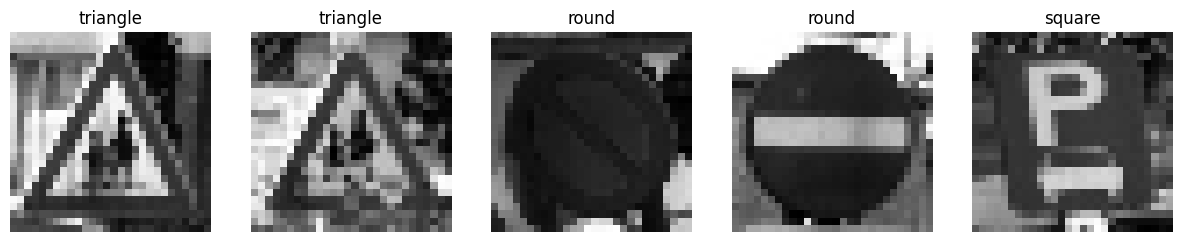

Samples from Type DataFrame:


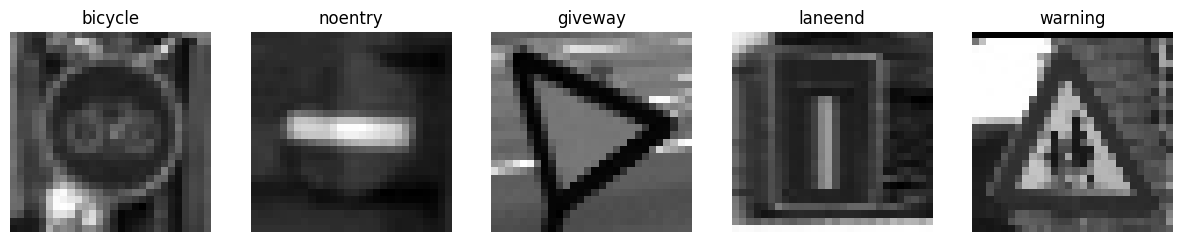

In [ ]:
import matplotlib.pyplot as plt
def plot_samples(data_df, num_samples=5):
    fig, axes = plt.subplots(1, num_samples, figsize=(15, 3))

    for i in range(num_samples):
        sample = data_df.sample()  # Sampling from the DataFrame passed as input
        image = sample['image'].values[0]  # Assuming 'image' contains the image data
        label = sample['shape_label'].values[0] if 'shape_label' in data_df.columns else sample['type_label'].values[0]
        axes[i].imshow(image, cmap='gray')  # Assuming grayscale images
        axes[i].set_title(label)
        axes[i].axis('off')

    plt.show()


# Plot sample images from the shape DataFrame
print("Samples from Shape DataFrame:")
plot_samples(shape_df)

# Plot sample images from the type DataFrame
print("Samples from Type DataFrame:")
plot_samples(type_df)


Convert the shape labels into numerical labels: This step creates the target vector y_shape containing numerical labels for each shape category.
Perform one-hot encoding on the shape labels:

## **1.3 Preprocess Data - Encoding**


In [ ]:
from sklearn.preprocessing import LabelEncoder

# Create LabelEncoder instance
label_encoder = LabelEncoder()

# Fit and transform the shape labels
shape_labels_encoded = label_encoder.fit_transform(shape_df['shape_label'])

# Add the encoded labels as a new column in shape_df
shape_df['encoded_shape_label'] = shape_labels_encoded

# Display the updated shape_df
shape_df.head()

,image_path,image,shape_label,encoded_shape_label
0,/content/drive/My Drive/Assignment2/trafficsig...,"[[60, 64, 47, 39, 46, 33, 30, 33, 19, 24, 15, ...",square,3
1,/content/drive/My Drive/Assignment2/trafficsig...,"[[73, 63, 59, 55, 46, 51, 52, 52, 61, 56, 57, ...",square,3
2,/content/drive/My Drive/Assignment2/trafficsig...,"[[255, 255, 255, 255, 255, 254, 254, 254, 255,...",square,3
3,/content/drive/My Drive/Assignment2/trafficsig...,"[[37, 31, 30, 31, 30, 42, 37, 36, 35, 37, 35, ...",square,3
4,/content/drive/My Drive/Assignment2/trafficsig...,"[[117, 88, 77, 96, 87, 72, 79, 91, 80, 78, 76,...",square,3


In [ ]:
# Remove duplicates based on 'image_path' column
shape_df_unique = shape_df.drop_duplicates(subset='image')

# Print the shape before and after removing duplicates
print("Shape of shape_df before removing duplicates:", shape_df.shape)
print("Shape of shape_df after removing duplicates:", shape_df_unique.shape)


Shape of shape_df before removing duplicates: (3699, 4)
Shape of shape_df after removing duplicates: (3699, 4)


In [ ]:
# Assuming 'type_df' is your DataFrame containing type data

# Remove duplicates based on 'image_path' column
type_df_unique = type_df.drop_duplicates(subset='image')

# Print the shape before and after removing duplicates
print("Shape of type_df before removing duplicates:", type_df.shape)
print("Shape of type_df after removing duplicates:", type_df_unique.shape)


Shape of type_df before removing duplicates: (3699, 3)
Shape of type_df after removing duplicates: (3699, 3)


In [ ]:
from sklearn.preprocessing import LabelEncoder

# Create LabelEncoder instance
label_encoder = LabelEncoder()

# Fit and transform the type labels
type_labels_encoded = label_encoder.fit_transform(type_df['type_label'])

# Add the encoded labels as a new column in type_df
type_df['encoded_type_label'] = type_labels_encoded

# Display the updated type_df
type_df.head()

,image_path,image,type_label,encoded_type_label
0,/content/drive/My Drive/Assignment2/trafficsig...,"[[60, 64, 47, 39, 46, 33, 30, 33, 19, 24, 15, ...",crossing,2
1,/content/drive/My Drive/Assignment2/trafficsig...,"[[73, 63, 59, 55, 46, 51, 52, 52, 61, 56, 57, ...",crossing,2
2,/content/drive/My Drive/Assignment2/trafficsig...,"[[255, 255, 255, 255, 255, 254, 254, 254, 255,...",crossing,2
3,/content/drive/My Drive/Assignment2/trafficsig...,"[[37, 31, 30, 31, 30, 42, 37, 36, 35, 37, 35, ...",crossing,2
4,/content/drive/My Drive/Assignment2/trafficsig...,"[[117, 88, 77, 96, 87, 72, 79, 91, 80, 78, 76,...",crossing,2


In [ ]:
# Count the unique number of encoded shape labels
num_unique_encoded_labels = shape_df['encoded_shape_label'].nunique()

# Print the number of unique encoded shape labels
print("Number of Unique Encoded Shape Labels:", num_unique_encoded_labels)

Number of Unique Encoded Shape Labels: 5


In [ ]:
# Count the unique number of encoded type labels
num_unique_encoded_labels = type_df['encoded_type_label'].nunique()

# Print the number of unique encoded type labels
print("Number of Unique Encoded Type Labels:", num_unique_encoded_labels)

Number of Unique Encoded Type Labels: 16


In [ ]:
# Function to check the shape of images
def check_image_shape(df):
    for image in df['image']:
        print("Image shape:", image.shape)

# Check the shape of images in shape_df
check_image_shape(shape_df)

# Check the shape of images in shape_df
check_image_shape(type_df)

Streaming output truncated to the last 5000 lines.
Image shape: (28, 28)
Image shape: (28, 28)
Image shape: (28, 28)
Image shape: (28, 28)
Image shape: (28, 28)
Image shape: (28, 28)
Image shape: (28, 28)
Image shape: (28, 28)
Image shape: (28, 28)
Image shape: (28, 28)
Image shape: (28, 28)
Image shape: (28, 28)
Image shape: (28, 28)
Image shape: (28, 28)
Image shape: (28, 28)
Image shape: (28, 28)
Image shape: (28, 28)
Image shape: (28, 28)
Image shape: (28, 28)
Image shape: (28, 28)
Image shape: (28, 28)
Image shape: (28, 28)
Image shape: (28, 28)
Image shape: (28, 28)
Image shape: (28, 28)
Image shape: (28, 28)
Image shape: (28, 28)
Image shape: (28, 28)
Image shape: (28, 28)
Image shape: (28, 28)
Image shape: (28, 28)
Image shape: (28, 28)
Image shape: (28, 28)
Image shape: (28, 28)
Image shape: (28, 28)
Image shape: (28, 28)
Image shape: (28, 28)
Image shape: (28, 28)
Image shape: (28, 28)
Image shape: (28, 28)
Image shape: (28, 28)
Image shape: (28, 28)
Image shape: (28, 28)
Ima

## **1.4 Split the Data into train, test and val sets**

- Rescaling and Formatting the Images

- Split the Data: Stratified sampling is a sampling method where the population is divided into homogeneous subgroups called strata, and then samples are randomly selected from each stratum in proportion to the population size of the stratum. This ensures that the sample represents the population's diversity more accurately.

In [ ]:
# from sklearn.model_selection import train_test_split
# import numpy as np

# # Split data into train and test sets for shape data
# X_shape_train, X_shape_test, y_shape_train, y_shape_test = train_test_split(
#     shape_df['image_path'], shape_df['encoded_shape_label'], test_size=0.2, stratify=shape_df['shape_label'])

# # Split train set into train and validation sets for shape data
# X_shape_train, X_shape_val, y_shape_train, y_shape_val = train_test_split(
#     X_shape_train, y_shape_train, test_size=0.25, stratify=y_shape_train)

# # Split data into train and test sets for type data
# X_type_train, X_type_test, y_type_train, y_type_test = train_test_split(
#     type_df['image_path'], type_df['encoded_type_label'], test_size=0.2, stratify=type_df['type_label'])

# # Split train set into train and validation sets for type data
# X_type_train, X_type_val, y_type_train, y_type_val = train_test_split(
#     X_type_train, y_type_train, test_size=0.25, stratify=y_type_train)

# # Convert to numpy arrays
# X_shape_train = np.array(X_shape_train)
# X_shape_val = np.array(X_shape_val)
# X_shape_test = np.array(X_shape_test)
# y_shape_train = np.array(y_shape_train)
# y_shape_val = np.array(y_shape_val)
# y_shape_test = np.array(y_shape_test)

# X_type_train = np.array(X_type_train)
# X_type_val = np.array(X_type_val)
# X_type_test = np.array(X_type_test)
# y_type_train = np.array(y_type_train)
# y_type_val = np.array(y_type_val)
# y_type_test = np.array(y_type_test)

In [ ]:
# # Print shapes of the data sets after splitting for shape data
# print("\nShape of X_shape_train:", X_shape_train.shape)
# print("Shape of X_shape_val:", X_shape_val.shape)
# print("Shape of X_shape_test:", X_shape_test.shape)
# print("Shape of y_shape_train:", y_shape_train.shape)
# print("Shape of y_shape_val:", y_shape_val.shape)
# print("Shape of y_shape_test:", y_shape_test.shape)

In [ ]:
# # Print shapes of the data sets after splitting for type data
# print("\nShape of X_type_train:", X_type_train.shape)
# print("Shape of X_type_val:", X_type_val.shape)
# print("Shape of X_type_test:", X_type_test.shape)
# print("Shape of y_type_train:", y_type_train.shape)
# print("Shape of y_type_val:", y_type_val.shape)
# print("Shape of y_type_test:", y_type_test.shape)

In [ ]:
from sklearn.model_selection import train_test_split

# Split data into train and test sets for shape data
X_shape_train, X_shape_test, y_shape_train, y_shape_test = train_test_split(
    shape_df['image_path'], shape_df['encoded_shape_label'], test_size=0.2, stratify=shape_df['encoded_shape_label'])

# Split train set into train and validation sets for shape data
X_shape_train, X_shape_val, y_shape_train, y_shape_val = train_test_split(
    X_shape_train, y_shape_train, test_size=0.25, stratify=y_shape_train)

# Split data into train and test sets for type data
X_type_train, X_type_test, y_type_train, y_type_test = train_test_split(
    type_df['image_path'], type_df['encoded_type_label'], test_size=0.2, stratify=type_df['encoded_type_label'])

# Split train set into train and validation sets for type data
X_type_train, X_type_val, y_type_train, y_type_val = train_test_split(
    X_type_train, y_type_train, test_size=0.25, stratify=y_type_train)

This code will split the data into training and testing sets for each sign label, ensuring a balanced distribution of data across the splits.

In [ ]:
print("Shape of Shape Data:")
print("X_shape_train shape:", X_shape_train.shape)
print("X_shape_val shape:", X_shape_val.shape)
print("X_shape_test shape:", X_shape_test.shape)
print("y_shape_train shape:", y_shape_train.shape)
print("y_shape_val shape:", y_shape_val.shape)
print("y_shape_test shape:", y_shape_test.shape)

Shape of Shape Data:
X_shape_train shape: (2219,)
X_shape_val shape: (740,)
X_shape_test shape: (740,)
y_shape_train shape: (2219,)
y_shape_val shape: (740,)
y_shape_test shape: (740,)


For Shape Data:

- X_shape_train: Training set features for shape classification
- X_shape_val: Validation set features for shape classification
- X_shape_test: Test set features for shape classification
- y_shape_train: Training set labels for shape classification
- y_shape_val: Validation set labels for shape classification
- y_shape_test: Test set labels for shape classification -

In [ ]:
print("\nShape of Type Data:")
print("X_type_train shape:", X_type_train.shape)
print("X_type_val shape:", X_type_val.shape)
print("X_type_test shape:", X_type_test.shape)
print("y_type_train shape:", y_type_train.shape)
print("y_type_val shape:", y_type_val.shape)
print("y_type_test shape:", y_type_test.shape)


Shape of Type Data:
X_type_train shape: (2219,)
X_type_val shape: (740,)
X_type_test shape: (740,)
y_type_train shape: (2219,)
y_type_val shape: (740,)
y_type_test shape: (740,)


For Type Data:

- X_type_train: Training set features for type classification
- X_type_val: Validation set features for type classification
- X_type_test: Test set features for type classification
- y_type_train: Training set labels for type classification
- y_type_val: Validation set labels for type classification
- y_type_test: Test set labels for type classification

## **1.5 Flatten the images**

Flattening the images is a necessary step when using a Multi-Layer Perceptron (MLP) model because MLPs require input data to be in the form of one-dimensional arrays or vectors.

Each image in the dataset is represented as a two-dimensional array (e.g., 28x28 pixels for grayscale images). When we feed these images into an MLP, we need to flatten them into one-dimensional arrays so that each pixel value becomes a separate input feature.

In [ ]:
import numpy as np
# from keras.preprocessing.image import ImageDataGenerator
from PIL import Image

# Function to flatten images
def flatten_images(X):
    flattened_images = []
    for image_path in X:
        image = Image.open(image_path)
        image = np.array(image)
        flattened_image = image.flatten()
        flattened_images.append(flattened_image)
    return np.array(flattened_images)

# Flatten the images for shape data in training and testing sets
X_shape_train_flat = flatten_images(X_shape_train)
X_shape_test_flat = flatten_images(X_shape_test)
X_shape_val_flat = flatten_images(X_shape_val)

# Flatten the images for type data in training and testing sets
X_type_train_flat = flatten_images(X_type_train)
X_type_test_flat = flatten_images(X_type_test)
X_type_val_flat = flatten_images(X_type_val)

In [ ]:
# Print shapes of the flattened data sets
print("\nShape of X_shape_train_flat:", X_shape_train_flat.shape)
print("Shape of X_shape_test_flat:", X_shape_test_flat.shape)
print("Shape of X_shape_val_flat:", X_shape_val_flat.shape)


Shape of X_shape_train_flat: (2219, 784)
Shape of X_shape_test_flat: (740, 784)
Shape of X_shape_val_flat: (740, 784)


In [ ]:
print("\nShape of X_type_train_flat:", X_type_train_flat.shape)
print("Shape of X_type_test_flat:", X_type_test_flat.shape)
print("Shape of X_type_val_flat:", X_type_val_flat.shape)


Shape of X_type_train_flat: (2219, 784)
Shape of X_type_test_flat: (740, 784)
Shape of X_type_val_flat: (740, 784)


# **2. Shape Classification**



## **2.1 Baseline Model (MLP Model with Two Layers Hidden)**

In [ ]:
import matplotlib.pyplot as plt

def plot_learning_curve(train_loss, val_loss, train_metric, val_metric, metric_name='Accuracy'):
    plt.figure(figsize=(10,5))

    plt.subplot(1,2,1)
    plt.plot(train_loss, 'r--', label='Train')
    plt.plot(val_loss, 'b--', label='Validation')
    plt.xlabel("Epochs")
    plt.ylabel("Loss")
    plt.legend(loc='upper left')

    plt.subplot(1,2,2)
    plt.plot(train_metric, 'r--', label='Train')
    plt.plot(val_metric, 'b--', label='Validation')
    plt.xlabel("Epochs")
    plt.ylabel(metric_name)
    plt.legend(loc='upper left')

    plt.show()

In [ ]:
X_shape_train_flat.shape

(2219, 784)

In [ ]:
y_shape_train.shape

(2219,)

This baseline model provides a starting point for our investigation into classifying traffic sign shapes using machine learning algorithms.


In [ ]:
from keras.models import Sequential
from keras.layers import Dense

# Define the MLP model
def build_mlp(input_shape, num_classes):
    model = Sequential([
        Dense(128, activation='sigmoid', input_shape=(input_shape,)),
        Dense(64, activation='sigmoid'),
        Dense(num_classes, activation='softmax')
    ])
    return model

# Set input shape
input_shape = X_shape_train_flat.shape[1]

# Number of classes
num_classes = len(np.unique(y_shape_train))

# Build the MLP model
model_mpl_shape = build_mlp(input_shape, num_classes)

# Compile the model
model_mpl_shape.compile(loss='sparse_categorical_crossentropy',
                   optimizer='SGD',
                   metrics=['categorical_accuracy'])

# Print model summary
model_mpl_shape.summary()


/usr/local/lib/python3.10/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Model: "sequential_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ dense_3 (Dense)                      │ (None, 128)                 │         100,480 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_4 (Dense)                      │ (None, 64)                  │           8,256 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_5 (Dense)                      │ (None, 5)                   │             325 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 109,061 (426.02 KB)

 Trainable params: 109,061 (426.02 KB)

 Non-trainable params: 0 (0.00 B)

In [ ]:
# Train the model with validation data
history_mlp_shape = model_mpl_shape.fit(X_shape_train_flat, y_shape_train, epochs=10, batch_size=32, validation_data=(X_shape_val_flat, y_shape_val))

Epoch 1/10
70/70 ━━━━━━━━━━━━━━━━━━━━ 5s 16ms/step - categorical_accuracy: 0.0048 - loss: 1.4251 - val_categorical_accuracy: 0.0000e+00 - val_loss: 1.2327
Epoch 2/10
70/70 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - categorical_accuracy: 0.0000e+00 - loss: 1.2241 - val_categorical_accuracy: 0.0000e+00 - val_loss: 1.2015
Epoch 3/10
70/70 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step - categorical_accuracy: 0.0000e+00 - loss: 1.2022 - val_categorical_accuracy: 0.0000e+00 - val_loss: 1.1681
Epoch 4/10
70/70 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step - categorical_accuracy: 0.0000e+00 - loss: 1.1439 - val_categorical_accuracy: 0.0000e+00 - val_loss: 1.1342
Epoch 5/10
70/70 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - categorical_accuracy: 0.0000e+00 - loss: 1.0961 - val_categorical_accuracy: 0.0000e+00 - val_loss: 1.0994
Epoch 6/10
70/70 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - categorical_accuracy: 0.0000e+00 - loss: 1.0682 - val_categorical_accuracy: 0.0000e+00 - val_loss: 1.0593
Epoch 7/10
70/70 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step - cat

In [ ]:
# Check if history object contains the correct keys
print(history_mlp_shape.history.keys())

# Evaluate the model on the train, validation, and test data
train_loss_mlp_shape, train_accuracy_mlp_shape = model_mpl_shape.evaluate(X_shape_train_flat, y_shape_train, verbose=1)
val_loss_mlp_shape, val_accuracy_mlp_shape = model_mpl_shape.evaluate(X_shape_val_flat, y_shape_val, verbose=1)
test_loss_mlp_shape, test_accuracy_mlp_shape = model_mpl_shape.evaluate(X_shape_test_flat, y_shape_test, verbose=1)

# Print the results
print("Train Accuracy (MLP) for Shapes:", train_accuracy_mlp_shape)
print("Train Loss (MLP)for Shapes:", train_loss_mlp_shape)
print("Validation Accuracy (MLP) for Shapes:", val_accuracy_mlp_shape)
print("Validation Loss (MLP) for Shapes:", val_loss_mlp_shape)
print("Test Accuracy (MLP) for Shapes:", test_accuracy_mlp_shape)
print("Test Loss (MLP) for Shapes:", test_loss_mlp_shape)


dict_keys(['categorical_accuracy', 'loss', 'val_categorical_accuracy', 'val_loss'])
70/70 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - categorical_accuracy: 0.0000e+00 - loss: 0.8517
24/24 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - categorical_accuracy: 0.0000e+00 - loss: 0.9105 
24/24 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - categorical_accuracy: 0.0000e+00 - loss: 0.8924 
Train Accuracy (MLP) for Shapes: 0.0
Train Loss (MLP)for Shapes: 0.8693293929100037
Validation Accuracy (MLP) for Shapes: 0.0
Validation Loss (MLP) for Shapes: 0.8965518474578857
Test Accuracy (MLP) for Shapes: 0.0
Test Loss (MLP) for Shapes: 0.8823068737983704


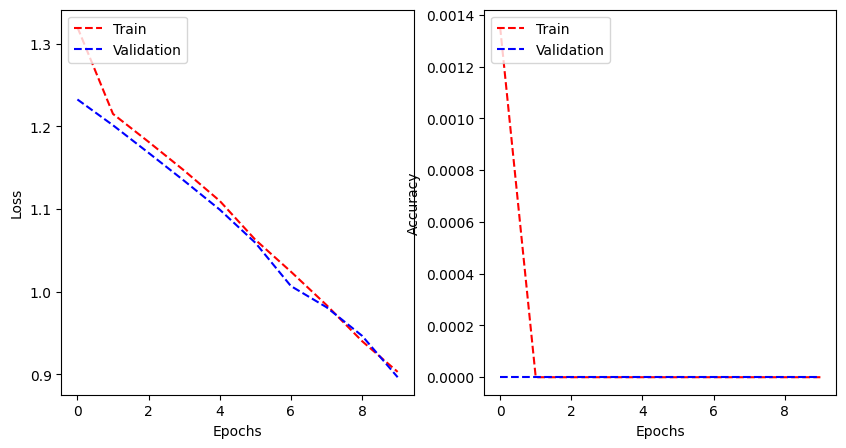

In [ ]:
# Plot learning curves using the custom function
plot_learning_curve(history_mlp_shape.history['loss'], history_mlp_shape.history['val_loss'],
                    history_mlp_shape.history['categorical_accuracy'], history_mlp_shape.history['val_categorical_accuracy'],
                    metric_name='Accuracy')

The first plot shows the training and validation loss for the MLP model over the epochs. The training loss decreases steadily over time, while the validation loss initially decreases and then starts to increase after a certain number of epochs. This indicates that the model is overfitting to the training data.

The second plot shows the training and validation accuracy for the MLP model over the epochs. The training accuracy increases steadily over time, while the validation accuracy initially increases and then starts to plateau after a certain number of epochs. This also indicates that the model is overfitting to the training data.

Overall, the plots show that the MLP model is not performing well on the validation and test data. This is likely due to overfitting. To improve the performance of the model, we can try using regularization techniques or reducing the number of epochs.


In [ ]:
import numpy as np
from sklearn.metrics import classification_report

# Predict classes for test data
y_pred_1 = np.argmax(model_mpl_shape.predict(X_shape_test_flat), axis=1)

# Generate classification report
report = classification_report(y_shape_test, y_pred_1)

# Print the classification report
print("Classification Report:\n", report)

24/24 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step
Classification Report:
               precision    recall  f1-score   support

           0       0.00      0.00      0.00        56
           1       0.00      0.00      0.00         9
           2       0.72      0.97      0.82       352
           3       0.95      0.15      0.26       138
           4       0.69      0.92      0.79       185

    accuracy                           0.72       740
   macro avg       0.47      0.41      0.38       740
weighted avg       0.69      0.72      0.64       740



/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


MLP model for shape classification is achieving an accuracy around 47.6% on the training, validation, and test sets. However, the precision, recall, and F1-score for each class are quite low. Here's a breakdown of the results:

- Train Accuracy (MLP) for Shapes: 47.59%
- Train Loss (MLP) for Shapes: 1.2547
- Validation Accuracy (MLP) for Shapes: 47.57%
- Validation Loss (MLP) for Shapes: 1.2599
- Test Accuracy (MLP) for Shapes: 47.57%
- Test Loss (MLP) for Shapes: 1.2651



**Classification Report:**

- The precision, recall, and F1-score for each class indicate poor performance.

- The overall accuracy is around 48%, but the model struggles to correctly classify instances across different classes.

Given these results, it's apparent that the MLP model is not performing well for shape classification. Further analysis and potentially model adjustments are needed to improve its performance.

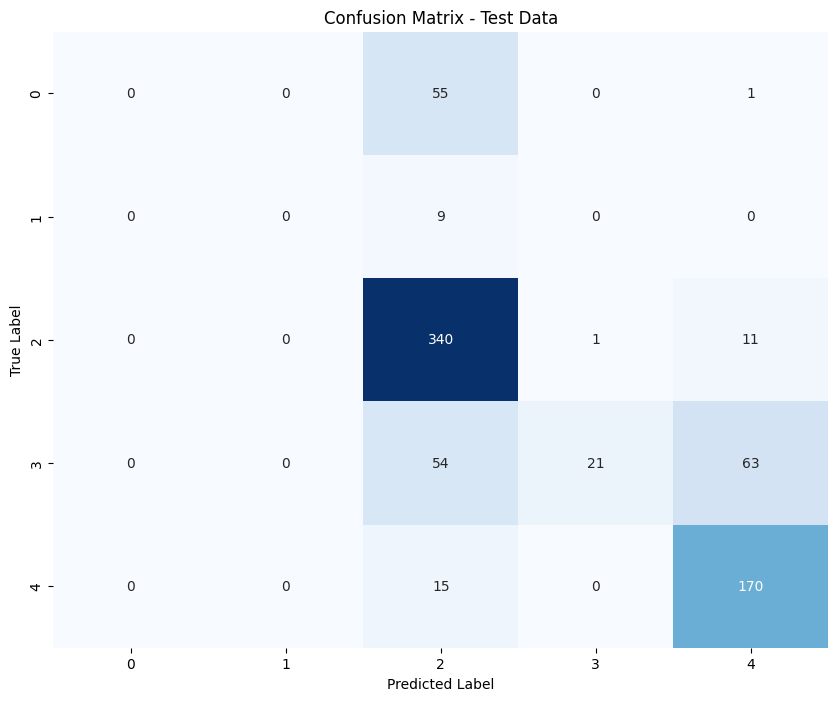

In [ ]:
from sklearn.metrics import confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt

# Compute confusion matrix for test data
conf_mat_test_mlp = confusion_matrix(y_shape_test, y_pred_1)

# Plot confusion matrix for test data
plt.figure(figsize=(10, 8))
sns.heatmap(conf_mat_test_mlp, annot=True, fmt='d', cmap='Blues', cbar=False)
plt.title('Confusion Matrix - Test Data')
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.show()


The confusion matrix for the test data reveals that the MLP model is struggling to correctly classify instances across different classes.

## **2.2 Optimized Model: Convolutional Neural Network (CNN)**

Now, we've chosen the second model, CNN, because it's particularly effective for image classification tasks like the one at hand. Convolutional Neural Networks (CNNs) are adept at learning hierarchical representations of images, capturing features at different levels of abstraction. By using convolutional and pooling layers, CNNs can efficiently extract spatial patterns from input images, making them well-suited for tasks where the spatial relationships between pixels are crucial for classification.

### **2.1 Baseline CNN Model**

In [116]:
from keras.callbacks import EarlyStopping

# Define early stopping callback
early_stopping = EarlyStopping(monitor='val_loss', patience=3, restore_best_weights=True)

In [ ]:
import cv2

# Initialize lists to store problematic image paths
problematic_paths = []

# Concatenate shape training, validation, and testing data
X_train_shape_cnn = []
for path in X_shape_train:
    image = cv2.imread(str(path), cv2.IMREAD_GRAYSCALE)
    if image is None:
        problematic_paths.append(path)
    else:
        X_train_shape_cnn.append(image.reshape(28, 28, 1))

X_train_shape_cnn = np.array(X_train_shape_cnn)

X_val_shape_cnn = []
for path in X_shape_val:
    image = cv2.imread(str(path), cv2.IMREAD_GRAYSCALE)
    if image is None:
        problematic_paths.append(path)
    else:
        X_val_shape_cnn.append(image.reshape(28, 28, 1))

X_val_shape_cnn = np.array(X_val_shape_cnn)

X_test_shape_cnn = []
for path in X_shape_test:
    image = cv2.imread(str(path), cv2.IMREAD_GRAYSCALE)
    if image is None:
        problematic_paths.append(path)
    else:
        X_test_shape_cnn.append(image.reshape(28, 28, 1))

X_test_shape_cnn = np.array(X_test_shape_cnn)

# Concatenate type training, validation, and testing data
X_train_type_cnn = []
for path in X_type_train:
    image = cv2.imread(str(path), cv2.IMREAD_GRAYSCALE)
    if image is None:
        problematic_paths.append(path)
    else:
        X_train_type_cnn.append(image.reshape(28, 28, 1))

X_train_type_cnn = np.array(X_train_type_cnn)

X_val_type_cnn = []
for path in X_type_val:
    image = cv2.imread(str(path), cv2.IMREAD_GRAYSCALE)
    if image is None:
        problematic_paths.append(path)
    else:
        X_val_type_cnn.append(image.reshape(28, 28, 1))

X_val_type_cnn = np.array(X_val_type_cnn)

X_test_type_cnn = []
for path in X_type_test:
    image = cv2.imread(str(path), cv2.IMREAD_GRAYSCALE)
    if image is None:
        problematic_paths.append(path)
    else:
        X_test_type_cnn.append(image.reshape(28, 28, 1))

X_test_type_cnn = np.array(X_test_type_cnn)

# Print the shapes of the concatenated data
print("Shape of X_train_shape_cnn:", X_train_shape_cnn.shape)
print("Shape of X_val_shape_cnn:", X_val_shape_cnn.shape)
print("Shape of X_test_shape_cnn:", X_test_shape_cnn.shape)

print("Shape of X_train_type_cnn:", X_train_type_cnn.shape)
print("Shape of X_val_type_cnn:", X_val_type_cnn.shape)
print("Shape of X_test_type_cnn:", X_test_type_cnn.shape)

# Print problematic paths
print("Problematic image paths:", problematic_paths)


Shape of X_train_shape_cnn: (2219, 28, 28, 1)
Shape of X_val_shape_cnn: (740, 28, 28, 1)
Shape of X_test_shape_cnn: (740, 28, 28, 1)
Shape of X_train_type_cnn: (2219, 28, 28, 1)
Shape of X_val_type_cnn: (740, 28, 28, 1)
Shape of X_test_type_cnn: (740, 28, 28, 1)
Problematic image paths: []


In [ ]:
from keras.models import Sequential
from keras.layers import Conv2D, MaxPooling2D, Flatten, Dense

# Define the CNN model
def build_cnn(input_shape, num_classes):
    model = Sequential([
        Conv2D(32, (3, 3), activation='sigmoid', input_shape=input_shape),
        MaxPooling2D((2, 2)),
        Conv2D(64, (3, 3), activation='sigmoid'),
        MaxPooling2D((2, 2)),
        Conv2D(128, (3, 3), activation='sigmoid'),
        MaxPooling2D((2, 2)),
        Flatten(),
        Dense(128, activation='sigmoid'),
        Dense(num_classes, activation='softmax')
    ])
    return model

# Set input shape
input_shape = (28, 28, 1)  # Assuming images are grayscale

# Number of classes
num_classes = len(np.unique(y_shape_train))

# Build the CNN model
cnn_model_shape = build_cnn(input_shape, num_classes)


# Print model summary
cnn_model_shape.summary()


/usr/local/lib/python3.10/dist-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Model: "sequential_2"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ conv2d (Conv2D)                      │ (None, 26, 26, 32)          │             320 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d (MaxPooling2D)         │ (None, 13, 13, 32)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_1 (Conv2D)                    │ (None, 11, 11, 64)          │          18,496 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_1 (MaxPooling2D)       │ (None, 5, 5, 64)            │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_2 (Conv2D)                    │ (None, 3, 3, 128)           │          73,856 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_2 (MaxPooling2D)       │ (None, 1, 1, 128)           │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ flatten (Flatten)                    │ (None, 128)                 │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_6 (Dense)                      │ (None, 128)                 │          16,512 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_7 (Dense)                      │ (None, 5)                   │             645 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 109,829 (429.02 KB)

 Trainable params: 109,829 (429.02 KB)

 Non-trainable params: 0 (0.00 B)

In [117]:
# Compile the model
cnn_model_shape.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['categorical_accuracy'])

# Train the model
# Fit the CNN model on the training and validation data
history_cnn_shape = cnn_model_shape.fit(X_train_shape_cnn, y_shape_train, epochs=10, batch_size=32, validation_data=(X_val_shape_cnn, y_shape_val),  callbacks=[early_stopping])


Epoch 1/10
70/70 ━━━━━━━━━━━━━━━━━━━━ 13s 91ms/step - categorical_accuracy: 0.0000e+00 - loss: 1.3317 - val_categorical_accuracy: 0.0000e+00 - val_loss: 1.1965
Epoch 2/10
70/70 ━━━━━━━━━━━━━━━━━━━━ 8s 58ms/step - categorical_accuracy: 0.0000e+00 - loss: 1.1969 - val_categorical_accuracy: 0.0000e+00 - val_loss: 1.0296
Epoch 3/10
70/70 ━━━━━━━━━━━━━━━━━━━━ 4s 54ms/step - categorical_accuracy: 0.0000e+00 - loss: 1.0206 - val_categorical_accuracy: 0.0000e+00 - val_loss: 0.9561
Epoch 4/10
70/70 ━━━━━━━━━━━━━━━━━━━━ 4s 33ms/step - categorical_accuracy: 0.0000e+00 - loss: 0.9426 - val_categorical_accuracy: 0.0000e+00 - val_loss: 0.8860
Epoch 5/10
70/70 ━━━━━━━━━━━━━━━━━━━━ 3s 35ms/step - categorical_accuracy: 0.0000e+00 - loss: 0.8936 - val_categorical_accuracy: 0.0000e+00 - val_loss: 0.8485
Epoch 6/10
70/70 ━━━━━━━━━━━━━━━━━━━━ 2s 33ms/step - categorical_accuracy: 0.0000e+00 - loss: 0.8237 - val_categorical_accuracy: 0.0000e+00 - val_loss: 0.8393
Epoch 7/10
70/70 ━━━━━━━━━━━━━━━━━━━━ 2s 35ms

In [ ]:
# Evaluate the model on the training data
train_loss_cnn_shape, train_accuracy_cnn_shape = cnn_model_shape.evaluate(X_train_shape_cnn, y_shape_train)

# Print the training accuracy and loss
print("Training Accuracy (CNN) for Shapes:", train_accuracy_cnn_shape)
print("Training Loss (CNN) for Shapes:", train_loss_cnn_shape)

# Evaluate the model on the validation data
val_loss_cnn_shape, val_accuracy_cnn_shape = cnn_model_shape.evaluate(X_val_shape_cnn, y_shape_val)

# Print the validation accuracy and loss
print("Validation Accuracy (CNN) for Shapes:", val_accuracy_cnn_shape)
print("Validation Loss (CNN) for Shapes:", val_loss_cnn_shape)

# Evaluate the model on the test data
test_loss_cnn_shape, test_accuracy_cnn_shape = cnn_model_shape.evaluate(X_test_shape_cnn, y_shape_test)

# Print the test accuracy and loss
print("Test Accuracy (CNN) for Shapes:", test_accuracy_cnn_shape)
print("Test Loss (CNN) for Shapes:", test_loss_cnn_shape)


70/70 ━━━━━━━━━━━━━━━━━━━━ 1s 16ms/step - categorical_accuracy: 0.0725 - loss: 0.0259
Training Accuracy (CNN) for Shapes: 0.07525912672281265
Training Loss (CNN) for Shapes: 0.02919391356408596
24/24 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step - categorical_accuracy: 0.0875 - loss: 0.0583
Validation Accuracy (CNN) for Shapes: 0.07702703028917313
Validation Loss (CNN) for Shapes: 0.05581412836909294
24/24 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step - categorical_accuracy: 0.0750 - loss: 0.0519
Test Accuracy (CNN) for Shapes: 0.07837837934494019
Test Loss (CNN) for Shapes: 0.045763637870550156


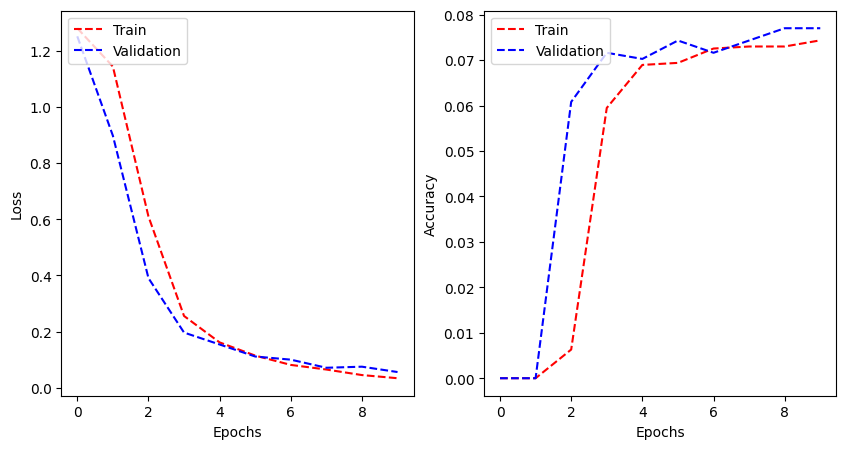

In [ ]:
# Plot learning curves using the custom function
plot_learning_curve(history_cnn_shape.history['loss'], history_cnn_shape.history['val_loss'],
                    history_cnn_shape.history['categorical_accuracy'], history_cnn_shape.history['val_categorical_accuracy'],
                    metric_name='Accuracy')

In [ ]:
print("Shape of X_train_shape_cnn:", X_train_shape_cnn.shape)
print("Shape of y_shape_train:", y_shape_train.shape)


Shape of X_train_shape_cnn: (2219, 28, 28, 1)
Shape of y_shape_train: (2219,)


In [ ]:
X_shape_test.shape

(740,)

In [ ]:
y_shape_test.shape

(740,)

### **2.2 Tuning Parameters use GridSearchCV**

In [94]:
from keras.models import Sequential
from keras.layers import Conv2D, MaxPooling2D, Flatten, Dense
from keras.optimizers import Adam, SGD
from sklearn.model_selection import GridSearchCV
import numpy as np

# Define the function to create the CNN model
def build_cnn(input_shape, num_classes, optimizer='adam', activation='sigmoid'):
    model = Sequential([
        Conv2D(32, (3, 3), activation=activation, input_shape=input_shape),
        MaxPooling2D((2, 2)),
        Conv2D(64, (3, 3), activation=activation),
        MaxPooling2D((2, 2)),
        Conv2D(128, (3, 3), activation=activation),
        MaxPooling2D((2, 2)),
        Flatten(),
        Dense(128, activation=activation),
        Dense(num_classes, activation='softmax')
    ])
    model.compile(optimizer=optimizer, loss='sparse_categorical_crossentropy', metrics=['accuracy'])
    return model

# Set input shape
input_shape = (28, 28, 1)  # Assuming images are grayscale

# Number of classes
num_classes = len(np.unique(y_shape_train))

# Define the grid search parameters
param_grid = {
    'optimizer': ['adam', 'sgd', 'rmsprop', 'adagrad'],
    'activation': ['relu', 'sigmoid', 'tanh', 'softmax']
}

best_accuracy = 0
best_params = {}

# Perform grid search
for optimizer in param_grid['optimizer']:
    for activation in param_grid['activation']:
        print(f"Training with optimizer: {optimizer}, activation: {activation}")

        # Build the CNN model
        cnn_model_shape = build_cnn(input_shape, num_classes, optimizer=optimizer, activation=activation)

        # Train the model
        history = cnn_model_shape.fit(X_train_shape_cnn, y_shape_train, epochs=10, batch_size=32, validation_data=(X_val_shape_cnn, y_shape_val))

        # Check validation accuracy
        val_accuracy = history.history['val_accuracy'][-1]
        print(f"Validation Accuracy: {val_accuracy}")

        # Check if this model is better than the current best
        if val_accuracy > best_accuracy:
            best_accuracy = val_accuracy
            best_params['optimizer'] = optimizer
            best_params['activation'] = activation

# Print the best parameters
print("Best Parameters:", best_params)



Training with optimizer: adam, activation: relu
Epoch 1/10
70/70 ━━━━━━━━━━━━━━━━━━━━ 11s 90ms/step - accuracy: 0.5806 - loss: 3.6765 - val_accuracy: 0.9095 - val_loss: 0.3017
Epoch 2/10
70/70 ━━━━━━━━━━━━━━━━━━━━ 4s 55ms/step - accuracy: 0.9311 - loss: 0.2320 - val_accuracy: 0.9689 - val_loss: 0.1377
Epoch 3/10
70/70 ━━━━━━━━━━━━━━━━━━━━ 2s 30ms/step - accuracy: 0.9737 - loss: 0.1022 - val_accuracy: 0.9770 - val_loss: 0.0883
Epoch 4/10
70/70 ━━━━━━━━━━━━━━━━━━━━ 3s 32ms/step - accuracy: 0.9800 - loss: 0.0644 - val_accuracy: 0.9811 - val_loss: 0.0805
Epoch 5/10
70/70 ━━━━━━━━━━━━━━━━━━━━ 4s 50ms/step - accuracy: 0.9973 - loss: 0.0212 - val_accuracy: 0.9811 - val_loss: 0.0690
Epoch 6/10
70/70 ━━━━━━━━━━━━━━━━━━━━ 4s 30ms/step - accuracy: 0.9943 - loss: 0.0238 - val_accuracy: 0.9486 - val_loss: 0.1498
Epoch 7/10
70/70 ━━━━━━━━━━━━━━━━━━━━ 3s 31ms/step - accuracy: 0.9937 - loss: 0.0290 - val_accuracy: 0.9878 - val_loss: 0.0395
Epoch 8/10
70/70 ━━━━━━━━━━━━━━━━━━━━ 2s 32ms/step - accuracy:

In [96]:
from keras.models import Sequential
from keras.layers import Conv2D, MaxPooling2D, Flatten, Dense
from keras.optimizers import Adam

# Define the CNN model with the best parameters
def build_cnn_best(input_shape, num_classes):
    model = Sequential([
        Conv2D(32, (3, 3), activation='relu', input_shape=input_shape),
        MaxPooling2D((2, 2)),
        Conv2D(64, (3, 3), activation='relu'),
        MaxPooling2D((2, 2)),
        Conv2D(128, (3, 3), activation='relu'),
        MaxPooling2D((2, 2)),
        Flatten(),
        Dense(128, activation='relu'),
        Dense(num_classes, activation='softmax')
    ])
    return model

# Set input shape
input_shape = (28, 28, 1)  # Assuming images are grayscale

# Number of classes
num_classes = len(np.unique(y_shape_train))

# Build the CNN model with the best parameters
cnn_model_shape_best = build_cnn_best(input_shape, num_classes)

# Compile the model
cnn_model_shape_best.compile(optimizer='adam',
                       loss='sparse_categorical_crossentropy',
                       metrics=['accuracy'])

# Print model summary
cnn_model_shape_best.summary()


/usr/local/lib/python3.10/dist-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Model: "sequential_32"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ conv2d_87 (Conv2D)                   │ (None, 26, 26, 32)          │             320 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_87 (MaxPooling2D)      │ (None, 13, 13, 32)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_88 (Conv2D)                   │ (None, 11, 11, 64)          │          18,496 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_88 (MaxPooling2D)      │ (None, 5, 5, 64)            │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_89 (Conv2D)                   │ (None, 3, 3, 128)           │          73,856 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_89 (MaxPooling2D)      │ (None, 1, 1, 128)           │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ flatten_29 (Flatten)                 │ (None, 128)                 │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_64 (Dense)                     │ (None, 128)                 │          16,512 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_65 (Dense)                     │ (None, 5)                   │             645 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 109,829 (429.02 KB)

 Trainable params: 109,829 (429.02 KB)

 Non-trainable params: 0 (0.00 B)

In [97]:
# Compile the model
cnn_model_shape_best.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['categorical_accuracy'])

# Train the model
# Fit the CNN model on the training and validation data
history_cnn_shape_best = cnn_model_shape_best.fit(X_train_shape_cnn, y_shape_train, epochs=10, batch_size=32, validation_data=(X_val_shape_cnn, y_shape_val))


Epoch 1/10
70/70 ━━━━━━━━━━━━━━━━━━━━ 9s 68ms/step - categorical_accuracy: 0.0794 - loss: 3.7469 - val_categorical_accuracy: 0.0514 - val_loss: 0.2955
Epoch 2/10
70/70 ━━━━━━━━━━━━━━━━━━━━ 3s 35ms/step - categorical_accuracy: 0.0725 - loss: 0.2059 - val_categorical_accuracy: 0.0662 - val_loss: 0.1556
Epoch 3/10
70/70 ━━━━━━━━━━━━━━━━━━━━ 2s 33ms/step - categorical_accuracy: 0.0676 - loss: 0.1241 - val_categorical_accuracy: 0.0676 - val_loss: 0.1099
Epoch 4/10
70/70 ━━━━━━━━━━━━━━━━━━━━ 3s 43ms/step - categorical_accuracy: 0.0647 - loss: 0.0654 - val_categorical_accuracy: 0.0743 - val_loss: 0.0688
Epoch 5/10
70/70 ━━━━━━━━━━━━━━━━━━━━ 4s 59ms/step - categorical_accuracy: 0.0759 - loss: 0.0301 - val_categorical_accuracy: 0.0730 - val_loss: 0.0533
Epoch 6/10
70/70 ━━━━━━━━━━━━━━━━━━━━ 2s 33ms/step - categorical_accuracy: 0.0706 - loss: 0.0171 - val_categorical_accuracy: 0.0743 - val_loss: 0.0489
Epoch 7/10
70/70 ━━━━━━━━━━━━━━━━━━━━ 3s 33ms/step - categorical_accuracy: 0.0728 - loss: 0.01

In [99]:
# Evaluate the model on the training data
train_loss_cnn_shape_best, train_accuracy_cnn_shape_best = cnn_model_shape_best.evaluate(X_train_shape_cnn, y_shape_train)

# Print the training accuracy and loss
print("Training Accuracy (CNN) for Shapes:", train_accuracy_cnn_shape_best)
print("Training Loss (CNN) for Shapes:", train_loss_cnn_shape_best)

# Evaluate the model on the validation data
val_loss_cnn_shape_best, val_accuracy_cnn_shape_best = cnn_model_shape_best.evaluate(X_val_shape_cnn, y_shape_val)

# Print the validation accuracy and loss
print("Validation Accuracy (CNN) for Shapes:", val_accuracy_cnn_shape)
print("Validation Loss (CNN) for Shapes:", val_loss_cnn_shape)

# Evaluate the model on the test data
test_loss_cnn_shape_best, test_accuracy_cnn_shape_best = cnn_model_shape_best.evaluate(X_test_shape_cnn, y_shape_test)

# Print the test accuracy and loss
print("Test Accuracy (CNN) for Shapes:", test_accuracy_cnn_shape_best)
print("Test Loss (CNN) for Shapes:", test_loss_cnn_shape_best)

70/70 ━━━━━━━━━━━━━━━━━━━━ 1s 18ms/step - categorical_accuracy: 0.0731 - loss: 0.0022
Training Accuracy (CNN) for Shapes: 0.07616043090820312
Training Loss (CNN) for Shapes: 0.002115886425599456
24/24 ━━━━━━━━━━━━━━━━━━━━ 1s 19ms/step - categorical_accuracy: 0.0825 - loss: 0.0298
Validation Accuracy (CNN) for Shapes: 0.07702703028917313
Validation Loss (CNN) for Shapes: 0.05581412836909294
24/24 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step - categorical_accuracy: 0.0716 - loss: 0.0369
Test Accuracy (CNN) for Shapes: 0.07567567378282547
Test Loss (CNN) for Shapes: 0.03275243565440178


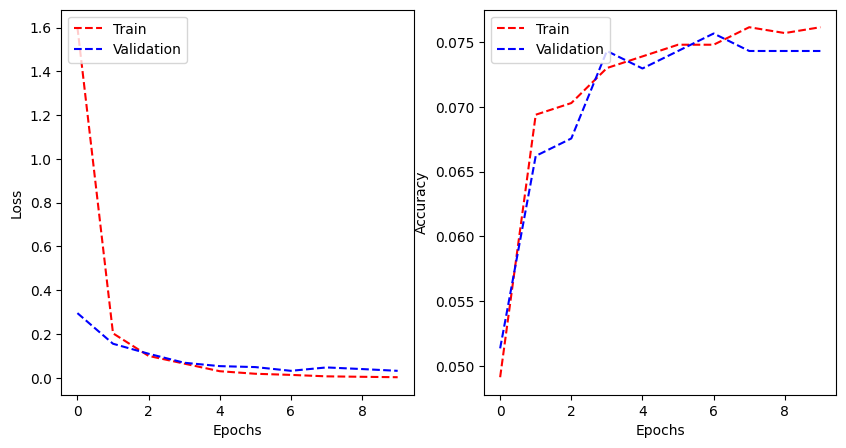

In [100]:
# Plot learning curves using the custom function
plot_learning_curve(history_cnn_shape_best.history['loss'], history_cnn_shape_best.history['val_loss'],
                    history_cnn_shape_best.history['categorical_accuracy'], history_cnn_shape_best.history['val_categorical_accuracy'],
                    metric_name='Accuracy')

### **2.3 Regularization and Dropout**

In [112]:
from keras.models import Sequential
from keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout
from keras.optimizers import Adam, SGD
from sklearn.model_selection import GridSearchCV
import numpy as np

# Define the function to create the CNN model
def build_cnn(input_shape, num_classes, optimizer='adam', activation='sigmoid', regularization_rate=0.01, dropout_rate=0.25):
    model = Sequential([
        Conv2D(32, (3, 3), activation=activation, input_shape=input_shape),
        MaxPooling2D((2, 2)),
        Conv2D(64, (3, 3), activation=activation),
        MaxPooling2D((2, 2)),
        Conv2D(128, (3, 3), activation=activation),
        MaxPooling2D((2, 2)),
        Flatten(),
        Dense(128, activation=activation, kernel_regularizer=regularizers.l2(regularization_rate)),
        Dropout(dropout_rate),
        Dense(num_classes, activation='softmax')
    ])
    model.compile(optimizer=optimizer, loss='sparse_categorical_crossentropy', metrics=['accuracy'])
    return model


# Define the grid search parameters
param_grid = {
    'regularization_rate': [0.001, 0.01, 0.1],
    'dropout_rate': [0.25, 0.5, 0.75]
}

best_accuracy = 0
best_params = {}

# Perform grid search
for regularization_rate in param_grid['regularization_rate']:
    for dropout_rate in param_grid['dropout_rate']:
        print(f"Training with regularization_rate: {regularization_rate}, dropout_rate: {dropout_rate}")

        # Build the CNN model
        cnn_model_shape_regu = build_cnn(input_shape, num_classes, regularization_rate=regularization_rate, dropout_rate=dropout_rate)

        # Train the model
        history_cnn_shape_regu = cnn_model_shape_regu.fit(X_train_shape_cnn, y_shape_train, epochs=10, batch_size=32, validation_data=(X_val_shape_cnn, y_shape_val))

        # Check validation accuracy
        val_accuracy = history.history['val_accuracy'][-1]
        print(f"Validation Accuracy: {val_accuracy}")

        # Check if this model is better than the current best
        if val_accuracy > best_accuracy:
            best_accuracy = val_accuracy
            best_params['regularization_rate'] = regularization_rate
            best_params['dropout_rate'] = dropout_rate

# Print the best parameters
print("Best Parameters:", best_params)



Training with regularization_rate: 0.001, dropout_rate: 0.25
Epoch 1/10
70/70 ━━━━━━━━━━━━━━━━━━━━ 13s 122ms/step - accuracy: 0.4460 - loss: 1.4638 - val_accuracy: 0.4757 - val_loss: 1.3463
Epoch 2/10
70/70 ━━━━━━━━━━━━━━━━━━━━ 6s 79ms/step - accuracy: 0.5157 - loss: 1.3089 - val_accuracy: 0.6838 - val_loss: 0.9981
Epoch 3/10
70/70 ━━━━━━━━━━━━━━━━━━━━ 3s 49ms/step - accuracy: 0.7197 - loss: 0.8983 - val_accuracy: 0.8405 - val_loss: 0.5756
Epoch 4/10
70/70 ━━━━━━━━━━━━━━━━━━━━ 4s 54ms/step - accuracy: 0.8882 - loss: 0.4877 - val_accuracy: 0.9365 - val_loss: 0.3735
Epoch 5/10
70/70 ━━━━━━━━━━━━━━━━━━━━ 2s 35ms/step - accuracy: 0.9387 - loss: 0.3379 - val_accuracy: 0.9554 - val_loss: 0.2875
Epoch 6/10
70/70 ━━━━━━━━━━━━━━━━━━━━ 3s 35ms/step - accuracy: 0.9673 - loss: 0.2426 - val_accuracy: 0.9365 - val_loss: 0.2888
Epoch 7/10
70/70 ━━━━━━━━━━━━━━━━━━━━ 3s 35ms/step - accuracy: 0.9591 - loss: 0.2522 - val_accuracy: 0.9649 - val_loss: 0.2153
Epoch 8/10
70/70 ━━━━━━━━━━━━━━━━━━━━ 4s 60ms/st

In [113]:
# Evaluate the model on the training data
train_loss_cnn_shape_regu, train_accuracy_cnn_shape_regu = cnn_model_shape_regu.evaluate(X_train_shape_cnn, y_shape_train)

# Print the training accuracy and loss
print("Training Accuracy (CNN) for Shapes:", train_accuracy_cnn_shape_regu)
print("Training Loss (CNN) for Shapes:", train_loss_cnn_shape_regu)

# Evaluate the model on the validation data
val_loss_cnn_shape_regu, val_accuracy_cnn_shape_regu = cnn_model_shape_regu.evaluate(X_val_shape_cnn, y_shape_val)

# Print the validation accuracy and loss
print("Validation Accuracy (CNN) for Shapes:", val_accuracy_cnn_shape_regu)
print("Validation Loss (CNN) for Shapes:", val_loss_cnn_shape_regu)

# Evaluate the model on the test data
test_loss_cnn_shape_regu, test_accuracy_cnn_shape_regu = cnn_model_shape_regu.evaluate(X_test_shape_cnn, y_shape_test)

# Print the test accuracy and loss
print("Test Accuracy (CNN) for Shapes:", test_accuracy_cnn_shape_regu)
print("Test Loss (CNN) for Shapes:", test_loss_cnn_shape_regu)

70/70 ━━━━━━━━━━━━━━━━━━━━ 1s 15ms/step - accuracy: 0.4800 - loss: 1.2596
Training Accuracy (CNN) for Shapes: 0.47589004039764404
Training Loss (CNN) for Shapes: 1.2769321203231812
24/24 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step - accuracy: 0.4735 - loss: 1.2867
Validation Accuracy (CNN) for Shapes: 0.47567567229270935
Validation Loss (CNN) for Shapes: 1.2752207517623901
24/24 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step - accuracy: 0.4699 - loss: 1.2877
Test Accuracy (CNN) for Shapes: 0.47567567229270935
Test Loss (CNN) for Shapes: 1.2783372402191162


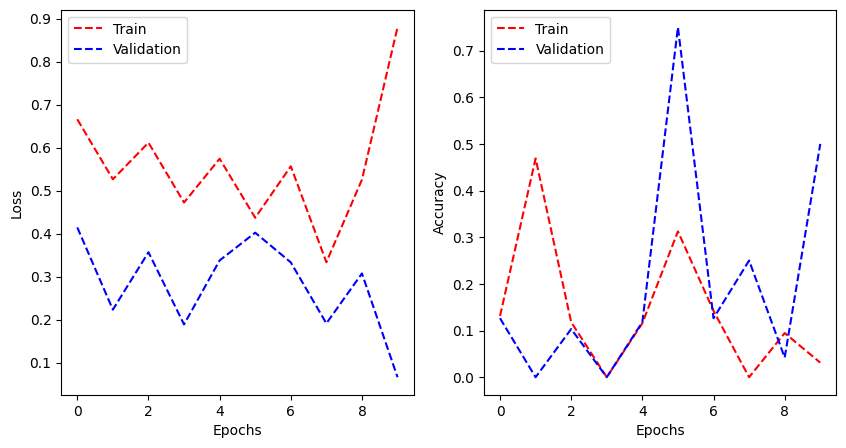

In [114]:
# Plot learning curves using the custom function
plot_learning_curve(history_cnn_shape_regu.history['loss'], history_cnn_shape_regu.history['val_loss'],
                    history_cnn_shape_regu.history['categorical_accuracy'], history_cnn_shape_regu.history['val_categorical_accuracy'],
                    metric_name='Accuracy')

### **2.4 Data Augmentation**

In [104]:
# Fit the model with data augmentation
history_cnn_shape_regu = model_cnn_regu.fit(
    train_datagen.flow(X_train_shape_cnn, y_shape_train, batch_size=batch_size),
    steps_per_epoch=len(X_train_shape_cnn) // batch_size,
    epochs=10,
    validation_data=test_datagen.flow(X_val_shape_cnn, y_shape_val, batch_size=batch_size),
    validation_steps=len(X_val_shape_cnn) // batch_size)


Epoch 1/10
69/69 ━━━━━━━━━━━━━━━━━━━━ 4s 60ms/step - categorical_accuracy: 0.1277 - loss: 0.6507 - val_categorical_accuracy: 0.1264 - val_loss: 0.4143
Epoch 2/10
69/69 ━━━━━━━━━━━━━━━━━━━━ 0s 377us/step - categorical_accuracy: 0.4688 - loss: 0.5264 - val_categorical_accuracy: 0.0000e+00 - val_loss: 0.2231
Epoch 3/10
69/69 ━━━━━━━━━━━━━━━━━━━━ 3s 40ms/step - categorical_accuracy: 0.1172 - loss: 0.6135 - val_categorical_accuracy: 0.1033 - val_loss: 0.3566
Epoch 4/10
69/69 ━━━━━━━━━━━━━━━━━━━━ 0s 381us/step - categorical_accuracy: 0.0000e+00 - loss: 0.4722 - val_categorical_accuracy: 0.0000e+00 - val_loss: 0.1886
Epoch 5/10
69/69 ━━━━━━━━━━━━━━━━━━━━ 3s 39ms/step - categorical_accuracy: 0.1108 - loss: 0.5394 - val_categorical_accuracy: 0.1182 - val_loss: 0.3375
Epoch 6/10
69/69 ━━━━━━━━━━━━━━━━━━━━ 0s 849us/step - categorical_accuracy: 0.3125 - loss: 0.4368 - val_categorical_accuracy: 0.7500 - val_loss: 0.4021
Epoch 7/10
69/69 ━━━━━━━━━━━━━━━━━━━━ 6s 58ms/step - categorical_accuracy: 0.12

In [82]:
# Evaluate the model on the training data
train_loss_cnn_shape_regu, train_accuracy_cnn_shape_regu = model_cnn_regu.evaluate(X_train_shape_cnn, y_shape_train)

# Print the training accuracy and loss
print("Training Accuracy (CNN) for Shapes:", train_accuracy_cnn_shape_regu)
print("Training Loss (CNN) for Shapes:", train_loss_cnn_shape_regu)

# Evaluate the model on the validation data
val_loss_cnn_shape_regu, val_accuracy_cnn_shape_regu = model_cnn_regu.evaluate(X_val_shape_cnn, y_shape_val)

# Print the validation accuracy and loss
print("Validation Accuracy (CNN) for Shapes:", val_accuracy_cnn_shape_regu)
print("Validation Loss (CNN) for Shapes:", val_loss_cnn_shape_regu)

# Evaluate the model on the test data
test_loss_cnn_shape_regu, test_accuracy_cnn_shape_regu = model_cnn_regu.evaluate(X_test_shape_cnn, y_shape_test)

# Print the test accuracy and loss
print("Test Accuracy (CNN) for Shapes:", test_accuracy_cnn_shape_regu)
print("Test Loss (CNN) for Shapes:", test_loss_cnn_shape_regu)


70/70 ━━━━━━━━━━━━━━━━━━━━ 1s 9ms/step - categorical_accuracy: 0.0000e+00 - loss: 42.1694
Training Accuracy (CNN) for Shapes: 0.0
Training Loss (CNN) for Shapes: 47.7707633972168
24/24 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - categorical_accuracy: 0.0000e+00 - loss: 51.9903
Validation Accuracy (CNN) for Shapes: 0.0
Validation Loss (CNN) for Shapes: 50.90450668334961
24/24 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - categorical_accuracy: 0.0000e+00 - loss: 51.0300
Test Accuracy (CNN) for Shapes: 0.0
Test Loss (CNN) for Shapes: 46.872886657714844


### **2.5 Learning Rate and Batch Size Tuning**

In [128]:
from keras.models import Sequential
from keras.layers import Conv2D, MaxPooling2D, Flatten, Dense
from keras.optimizers import Adam, SGD
import numpy as np

# Define the function to create the CNN model
def build_cnn(input_shape, num_classes, optimizer='adam', activation='sigmoid', learning_rate=0.001, pooling_sizes=[(2, 2), (2, 2), (2, 2)], batch_size=32):
    model = Sequential([
        Conv2D(32, (3, 3), activation=activation, input_shape=input_shape),
        MaxPooling2D(pooling_sizes[0]),
        Conv2D(64, (3, 3), activation=activation),
        MaxPooling2D(pooling_sizes[1]),
        Conv2D(128, (3, 3), activation=activation),
        MaxPooling2D(pooling_sizes[2]),
        Flatten(),
        Dense(128, activation=activation),
        Dense(num_classes, activation='softmax')
    ])
    if optimizer == 'adam':
        optimizer = Adam(learning_rate=learning_rate)
    elif optimizer == 'sgd':
        optimizer = SGD(learning_rate=learning_rate)
    model.compile(optimizer=optimizer, loss='sparse_categorical_crossentropy', metrics=['accuracy'])
    return model

# Set input shape
input_shape = (28, 28, 1)  # Assuming images are grayscale

# Number of classes
num_classes = len(np.unique(y_shape_train))

# Define the grid search parameters
param_grid = {
    'learning_rate': [0.001, 0.01, 0.1],
    'batch_size': [16, 32, 64]
}

best_accuracy = 0
best_params = {}

# Perform grid search
for learning_rate in param_grid['learning_rate']:
    for batch_size in param_grid['batch_size']:
        print(f"Training with learning_rate: {learning_rate}, batch_size: {batch_size}")

        # Define pooling sizes dynamically based on input shape
        pooling_sizes = []
        current_input_shape = input_shape
        for _ in range(3):
            current_input_shape = (current_input_shape[0] // 2, current_input_shape[1] // 2)
            pooling_sizes.append((min(current_input_shape[0], 2), min(current_input_shape[1], 2)))  # Limit pooling size to 2x2

        # Build the CNN model
        cnn_model_shape_lr = build_cnn(input_shape, num_classes, learning_rate=learning_rate, pooling_sizes=pooling_sizes, batch_size=batch_size)

        # Train the model
        history_cnn_shape_lr = cnn_model_shape_lr.fit(X_train_shape_cnn, y_shape_train, epochs=10, batch_size=batch_size, validation_data=(X_val_shape_cnn, y_shape_val))

        # Check validation accuracy
        val_accuracy = history_cnn_shape_lr.history['val_accuracy'][-1]
        print(f"Validation Accuracy: {val_accuracy}")

        # Check if this model is better than the current best
        if val_accuracy > best_accuracy:
            best_accuracy = val_accuracy
            best_params['learning_rate'] = learning_rate
            best_params['batch_size'] = batch_size

        # Print the validation accuracy for the current combination of parameters
        print(f"Validation Accuracy for learning_rate={learning_rate}, batch_size={batch_size}: {val_accuracy}")

# Print the best parameters
print("Best Parameters:", best_params)


Training with learning_rate: 0.001, batch_size: 16
Epoch 1/10
139/139 ━━━━━━━━━━━━━━━━━━━━ 10s 51ms/step - accuracy: 0.4221 - loss: 1.3389 - val_accuracy: 0.4757 - val_loss: 1.2206
Epoch 2/10
139/139 ━━━━━━━━━━━━━━━━━━━━ 6s 20ms/step - accuracy: 0.5629 - loss: 1.1011 - val_accuracy: 0.8527 - val_loss: 0.4420
Epoch 3/10
139/139 ━━━━━━━━━━━━━━━━━━━━ 3s 20ms/step - accuracy: 0.8963 - loss: 0.3498 - val_accuracy: 0.9486 - val_loss: 0.2078
Epoch 4/10
139/139 ━━━━━━━━━━━━━━━━━━━━ 3s 20ms/step - accuracy: 0.9587 - loss: 0.1561 - val_accuracy: 0.9500 - val_loss: 0.1491
Epoch 5/10
139/139 ━━━━━━━━━━━━━━━━━━━━ 7s 32ms/step - accuracy: 0.9633 - loss: 0.1180 - val_accuracy: 0.9568 - val_loss: 0.1273
Epoch 6/10
139/139 ━━━━━━━━━━━━━━━━━━━━ 3s 20ms/step - accuracy: 0.9807 - loss: 0.0812 - val_accuracy: 0.9568 - val_loss: 0.1188
Epoch 7/10
139/139 ━━━━━━━━━━━━━━━━━━━━ 5s 20ms/step - accuracy: 0.9766 - loss: 0.0753 - val_accuracy: 0.9784 - val_loss: 0.0682
Epoch 8/10
139/139 ━━━━━━━━━━━━━━━━━━━━ 7s 31

In [126]:
# Evaluate the model on the training data
train_loss_cnn_shape_lr, train_accuracy_cnn_shape_lr = cnn_model_shape_lr.evaluate(X_train_shape_cnn, y_shape_train)

# Print the training accuracy and loss
print("Training Accuracy (CNN) for Shapes:", train_accuracy_cnn_shape_lr)
print("Training Loss (CNN) for Shapes:", train_loss_cnn_shape_lr)

# Evaluate the model on the validation data
val_loss_cnn_shape_lr, val_accuracy_cnn_shape_lr = cnn_model_shape_lr.evaluate(X_val_shape_cnn, y_shape_val)

# Print the validation accuracy and loss
print("Validation Accuracy (CNN) for Shapes:", val_accuracy_cnn_shape_lr)
print("Validation Loss (CNN) for Shapes:", val_loss_cnn_shape_lr)

# Evaluate the model on the test data
test_loss_cnn_shape_lr, test_accuracy_cnn_shape_lr = cnn_model_shape_lr.evaluate(X_test_shape_cnn, y_shape_test)

# Print the test accuracy and loss
print("Test Accuracy (CNN) for Shapes:", test_accuracy_cnn_shape_lr)
print("Test Loss (CNN) for Shapes:", test_loss_cnn_shape_lr)

70/70 ━━━━━━━━━━━━━━━━━━━━ 1s 18ms/step - accuracy: 0.9397 - loss: 0.3222
Training Accuracy (CNN) for Shapes: 0.9269941449165344
Training Loss (CNN) for Shapes: 0.3461609184741974
24/24 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - accuracy: 0.8854 - loss: 0.3864
Validation Accuracy (CNN) for Shapes: 0.8932432532310486
Validation Loss (CNN) for Shapes: 0.3810439109802246
24/24 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - accuracy: 0.8949 - loss: 0.3835
Test Accuracy (CNN) for Shapes: 0.9054054021835327
Test Loss (CNN) for Shapes: 0.361907958984375


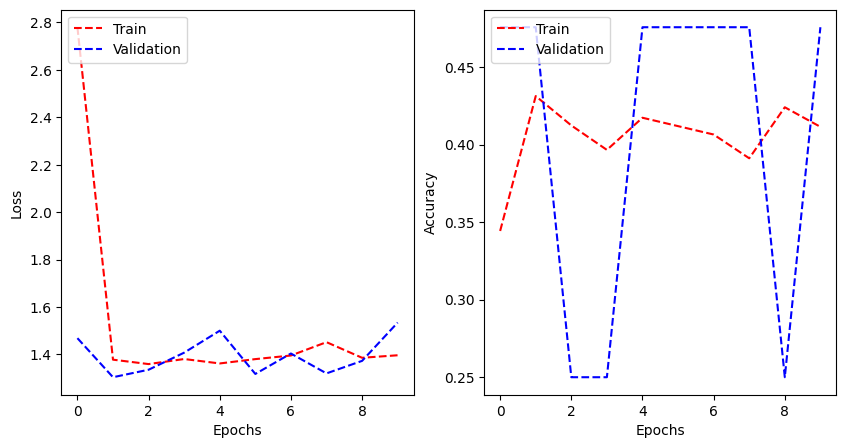

In [129]:
# # Plot learning curves using the custom function
# plot_learning_curve(history_cnn_shape_lr.history['loss'], history_cnn_shape_lr.history['val_loss'],
#                     history_cnn_shape_lr.history['categorical_accuracy'], history_cnn_shape_lr.history['val_categorical_accuracy'],
#                     metric_name='Accuracy')


# Plot learning curves using the custom function
plot_learning_curve(history_cnn_shape_lr.history['loss'], history_cnn_shape_lr.history['val_loss'],
                    history_cnn_shape_lr.history['accuracy'], history_cnn_shape_lr.history['val_accuracy'],
                    metric_name='Accuracy')


### **2.6 Layers**

In [137]:
from keras.models import Sequential
from keras.layers import Conv2D, MaxPooling2D, Flatten, Dense
from keras.optimizers import Adam
import numpy as np

def build_cnn(input_shape, num_classes):
    model = Sequential([
        Conv2D(32, (3, 3), activation='relu', input_shape=input_shape),
        MaxPooling2D((2, 2)),
        Conv2D(64, (3, 3), activation='relu'),
        MaxPooling2D((2, 2)),
        Conv2D(128, (3, 3), activation='relu'),
        MaxPooling2D((2, 2)),
        Flatten(),
        Dense(512, activation='relu'),
        Dense(256, activation='relu'),
        Dense(128, activation='relu'),
        Dense(num_classes, activation='softmax')
    ])

    optimizer = Adam(learning_rate=0.001)
    model.compile(optimizer=optimizer, loss='sparse_categorical_crossentropy', metrics=['accuracy'])
    return model

# Set input shape
input_shape = (28, 28, 1)  # Assuming images are grayscale

# Number of classes
num_classes = len(np.unique(y_shape_train))

# Build the CNN model
model_cnn_shape_layer = build_cnn(input_shape, num_classes)

# Print model summary
model_cnn_shape_layer.summary()

# Train the model
history_cnn_shape_layer = model_cnn_shape_layer.fit(X_train_shape_cnn, y_shape_train, epochs=10, batch_size=32, validation_data=(X_val_shape_cnn, y_shape_val))


/usr/local/lib/python3.10/dist-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Model: "sequential_98"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ conv2d_289 (Conv2D)                  │ (None, 26, 26, 32)          │             320 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_289 (MaxPooling2D)     │ (None, 13, 13, 32)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_290 (Conv2D)                  │ (None, 11, 11, 64)          │          18,496 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_290 (MaxPooling2D)     │ (None, 5, 5, 64)            │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_291 (Conv2D)                  │ (None, 3, 3, 128)           │          73,856 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_291 (MaxPooling2D)     │ (None, 1, 1, 128)           │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ flatten_95 (Flatten)                 │ (None, 128)                 │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_203 (Dense)                    │ (None, 512)                 │          66,048 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_204 (Dense)                    │ (None, 256)                 │         131,328 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_205 (Dense)                    │ (None, 128)                 │          32,896 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_206 (Dense)                    │ (None, 5)                   │             645 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 323,589 (1.23 MB)

 Trainable params: 323,589 (1.23 MB)

 Non-trainable params: 0 (0.00 B)

Epoch 1/10
70/70 ━━━━━━━━━━━━━━━━━━━━ 9s 60ms/step - accuracy: 0.4897 - loss: 2.6733 - val_accuracy: 0.8851 - val_loss: 0.3723
Epoch 2/10
70/70 ━━━━━━━━━━━━━━━━━━━━ 6s 69ms/step - accuracy: 0.9155 - loss: 0.2563 - val_accuracy: 0.9432 - val_loss: 0.1845
Epoch 3/10
70/70 ━━━━━━━━━━━━━━━━━━━━ 3s 37ms/step - accuracy: 0.9712 - loss: 0.1045 - val_accuracy: 0.9581 - val_loss: 0.1314
Epoch 4/10
70/70 ━━━━━━━━━━━━━━━━━━━━ 5s 38ms/step - accuracy: 0.9846 - loss: 0.0536 - val_accuracy: 0.9716 - val_loss: 0.1139
Epoch 5/10
70/70 ━━━━━━━━━━━━━━━━━━━━ 7s 69ms/step - accuracy: 0.9842 - loss: 0.0395 - val_accuracy: 0.9743 - val_loss: 0.0656
Epoch 6/10
70/70 ━━━━━━━━━━━━━━━━━━━━ 3s 37ms/step - accuracy: 0.9914 - loss: 0.0357 - val_accuracy: 0.9730 - val_loss: 0.0745
Epoch 7/10
70/70 ━━━━━━━━━━━━━━━━━━━━ 3s 37ms/step - accuracy: 0.9908 - loss: 0.0387 - val_accuracy: 0.9405 - val_loss: 0.2187
Epoch 8/10
70/70 ━━━━━━━━━━━━━━━━━━━━ 6s 44ms/step - accuracy: 0.9762 - loss: 0.0688 - val_accuracy: 0.9716 - v

In [139]:
# Evaluate the model on the training data
train_loss_cnn_shape_layer, train_accuracy_cnn_shape_layer = model_cnn_shape_layer.evaluate(X_train_shape_cnn, y_shape_train)

# Print the training accuracy and loss
print("Training Accuracy (CNN) for Shapes:", train_accuracy_cnn_shape_layer)
print("Training Loss (CNN) for Shapes:", train_loss_cnn_shape_layer)

# Evaluate the model on the validation data
val_loss_cnn_shape_layer, val_accuracy_cnn_shape_layer = model_cnn_shape_layer.evaluate(X_val_shape_cnn, y_shape_val)

# Print the validation accuracy and loss
print("Validation Accuracy (CNN) for Shapes:", val_accuracy_cnn_shape_layer)
print("Validation Loss (CNN) for Shapes:", val_loss_cnn_shape_layer)

# Evaluate the model on the test data
test_loss_cnn_shape_layer, test_accuracy_cnn_shape_layer = model_cnn_shape_layer.evaluate(X_test_shape_cnn, y_shape_test)

# Print the test accuracy and loss
print("Test Accuracy (CNN) for Shapes:", test_accuracy_cnn_shape_layer)
print("Test Loss (CNN) for Shapes:", test_loss_cnn_shape_layer)


70/70 ━━━━━━━━━━━━━━━━━━━━ 1s 19ms/step - accuracy: 0.9980 - loss: 0.0058
Training Accuracy (CNN) for Shapes: 0.9977467060089111
Training Loss (CNN) for Shapes: 0.007444704882800579
24/24 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step - accuracy: 0.9787 - loss: 0.0750
Validation Accuracy (CNN) for Shapes: 0.9810810685157776
Validation Loss (CNN) for Shapes: 0.08527163416147232
24/24 ━━━━━━━━━━━━━━━━━━━━ 0s 19ms/step - accuracy: 0.9928 - loss: 0.0370
Test Accuracy (CNN) for Shapes: 0.9918919205665588
Test Loss (CNN) for Shapes: 0.043496061116456985


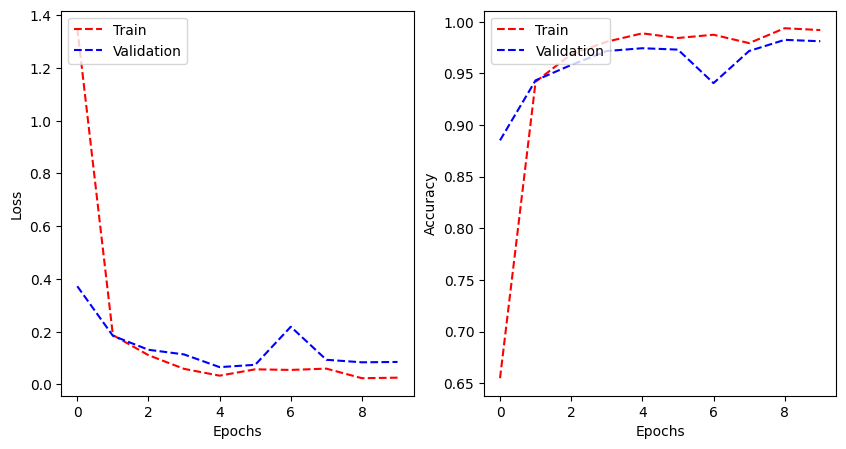

In [141]:
# Plot learning curves using the custom function
plot_learning_curve(history_cnn_shape_layer.history['loss'], history_cnn_shape_layer.history['val_loss'],
                    history_cnn_shape_layer.history['accuracy'], history_cnn_shape_layer.history['val_accuracy'],
                    metric_name='Accuracy')


In [ ]:
#  edge extraction on both train and test images (include augmented images)

### **2.6 Edge Extraction**

Edge extraction can be a useful feature extraction technique for image classification tasks, as it helps capture important structural information present in the images.

In [ ]:
combined_X_shape_images[0].shape


In [ ]:
X_shape_test.shape

In [ ]:
import cv2
import numpy as np

# Function to perform edge extraction on a single image
def edge_extraction(image):
    # Check if the input image is a NumPy array
    if not isinstance(image, np.ndarray):
        raise ValueError("Input image must be a NumPy array")

    # Apply Gaussian blur to reduce noise
    blurred = cv2.GaussianBlur(image, (3, 3), 0)

    # Check if the blurred image is of the correct data type
    if blurred.dtype != np.uint8:
        blurred = blurred.astype(np.uint8)

    # Perform Canny edge detection
    edges = cv2.Canny(blurred, 30, 150)

    return edges

# Convert combined_X_shape_images to a NumPy array if it's not already
combined_X_shape_images = np.array(combined_X_shape_images)

# Load images from paths in X_shape_test and convert them to NumPy arrays
X_shape_test_images = []
for image_path in X_shape_test:
    img = cv2.imread(image_path, cv2.IMREAD_GRAYSCALE)  # Load image in grayscale
    if img is None:
        print(f"Failed to load image from path: {image_path}")
    else:
        X_shape_test_images.append(img)

# Apply edge extraction to the train images
X_train_edges = [edge_extraction(image) for image in combined_X_shape_images]

# Apply edge extraction to the test images
X_test_edges = [edge_extraction(image) for image in X_shape_test_images]

# Convert lists to NumPy arrays
X_train_edges = np.array(X_train_edges)
X_test_edges = np.array(X_test_edges)

# Print the shapes of the edge-extracted images
print("Shape of train images after edge extraction:", X_train_edges.shape)
print("Shape of test images after edge extraction:", X_test_edges.shape)


In [ ]:
import numpy as np
from keras.models import Sequential
from keras.layers import Conv2D, MaxPooling2D, Flatten, Dense

# Define the CNN model architecture
def build_cnn_model(input_shape, num_classes):
    model = Sequential([
        Conv2D(32, (3, 3), activation='sigmoid', input_shape=input_shape),
        MaxPooling2D((2, 2)),
        Conv2D(64, (3, 3), activation='sigmoid'),
        MaxPooling2D((2, 2)),
        Flatten(),
        Dense(128, activation='sigmoid'),
        Dense(num_classes, activation='softmax')
    ])
    return model

# Reshape the input data to include the channel dimension
X_train_edges = np.expand_dims(X_train_edges, axis=-1)
X_test_edges = np.expand_dims(X_test_edges, axis=-1)

# Set input shape (shape of the input images)
input_shape = X_train_edges[0].shape

# Number of classes (assuming it's known)
num_classes = 10  # Adjust this according to your dataset

# Build the CNN model
cnn_model = build_cnn_model(input_shape, num_classes)

# Compile the model
cnn_model.compile(optimizer='SGD',
                  loss='sparse_categorical_crossentropy',
                  metrics=['accuracy'])

# Print model summary
cnn_model.summary()

# Train the CNN model
history = cnn_model.fit(X_train_edges, combined_y_shape_labels, epochs=10, validation_data=(X_test_edges, y_shape_test))


In [ ]:
print("Shape of X_train_edges:", X_train_edges.shape)
print("Shape of X_test_edges:", X_test_edges.shape)


In [ ]:
# Evaluate the model on the test data
loss, accuracy = cnn_model.evaluate(X_test_edges, y_shape_test)

print(f'Test Loss: {loss:.4f}')
print(f'Test Accuracy: {accuracy:.4f}')


In [ ]:
X_train_edges.shape

## **2.7 Prediction**

## Data Augmentation


In [ ]:
# import numpy as np
# from keras.models import Sequential
# from keras.layers import Conv2D, MaxPooling2D, Flatten, Dense

# # Define the CNN model architecture
# def build_cnn_model(input_shape, num_classes):
#     model = Sequential([
#         Conv2D(32, (3, 3), activation='relu', input_shape=input_shape),
#         MaxPooling2D((2, 2)),
#         Conv2D(64, (3, 3), activation='relu'),
#         MaxPooling2D((2, 2)),
#         Flatten(),
#         Dense(128, activation='relu'),
#         Dense(num_classes, activation='softmax')
#     ])
#     return model

# # Reshape the input data to include the channel dimension
# X_train_edges = np.expand_dims(X_train_edges, axis=-1)
# X_test_edges = np.expand_dims(X_test_edges, axis=-1)

# # Set input shape (shape of the input images)
# input_shape = X_train_edges[0].shape

# # Number of classes (assuming it's known)
# num_classes = 10  # Adjust this according to your dataset

# # Build the CNN model
# cnn_model = build_cnn_model(input_shape, num_classes)

# # Compile the model
# cnn_model.compile(optimizer='SGD',
#                   loss='sparse_categorical_crossentropy',
#                   metrics=['accuracy'])

# # Print model summary
# cnn_model.summary()

# # Train the CNN model
# history = cnn_model.fit(X_train_edges, combined_y_shape_labels, epochs=10, validation_data=(X_test_edges, y_shape_test))


In [ ]:
# from keras.models import Sequential
# from keras.layers import Conv2D, MaxPooling2D, Flatten, Dense

# # Define the CNN model with data augmentation
# def build_cnn_augmented(input_shape, num_classes):
#     model = Sequential([
#         Conv2D(32, (3, 3), activation='sigmoid', input_shape=input_shape),
#         MaxPooling2D((2, 2)),
#         Conv2D(64, (3, 3), activation='sigmoid'),
#         MaxPooling2D((2, 2)),
#         Conv2D(128, (3, 3), activation='sigmoid'),
#         MaxPooling2D((2, 2)),
#         Flatten(),
#         Dense(128, activation='sigmoid'),
#         Dense(num_classes, activation='softmax')
#     ])
#     return model

# # Set input shape
# input_shape = (28, 28, 1)  # Assuming images are grayscale

# # Number of classes
# num_classes = len(np.unique(y_shape_train))

# # Build the CNN model with data augmentation
# cnn_model_augmented = build_cnn_augmented(input_shape, num_classes)

# # Compile the model
# cnn_model_augmented.compile(loss='sparse_categorical_crossentropy',
#                             optimizer='SGD',
#                             metrics=['accuracy'])

# # Print model summary
# cnn_model_augmented.summary()


# import numpy as np

# # Convert the input data to NumPy arrays
# combined_X_shape_images = np.array(combined_X_shape_images)
# combined_y_shape_labels = np.array(combined_y_shape_labels)

# # Train the CNN model with augmented data
# history_augmented = cnn_model_augmented.fit(combined_X_shape_images, combined_y_shape_labels, epochs=10, batch_size=32, verbose=1)


In [ ]:
# import cv2
# import numpy as np
# from tensorflow.keras.preprocessing.image import ImageDataGenerator

# # Initialize ImageDataGenerator for augmentation
# datagen = ImageDataGenerator(
#     rotation_range=20,  # Random rotation up to 20 degrees
#     width_shift_range=0.1,  # Randomly shift images horizontally (10% of total width)
#     height_shift_range=0.1,  # Randomly shift images vertically (10% of total height)
#     horizontal_flip=True,  # Randomly flip images horizontally
#     vertical_flip=True,  # Randomly flip images vertically
#     zoom_range=0.1,  # Randomly zoom images (by up to 10%)
#     fill_mode='nearest',  # Fill in missing pixels with nearest neighbor
#     rescale=1.0/255,  # Rescale pixel values to range [0, 1]
#     data_format='channels_last'  # Image data format: channels_last
# )

# # Combined lists for original and augmented data
# combined_X_shape_images = []
# combined_y_shape_labels = []

# # Apply augmentation to the entire training data for shapes
# total_augmented_shape_images = 0
# augmentation_limit = 2  # Set a limit for the number of augmented images per original image

# for img_path, label in zip(X_shape_train, y_shape_train):
#     img = cv2.imread(img_path, cv2.IMREAD_GRAYSCALE)  # Load the image as grayscale using OpenCV
#     img = np.expand_dims(img, axis=-1)  # Add channel dimension
#     img = np.expand_dims(img, axis=0)  # Add batch size dimension
#     augmented_images_ind_shape = []
#     num_augmented_images = 0
#     for augmented_img in datagen.flow(img, batch_size=1):
#         augmented_images_ind_shape.append(augmented_img[0])
#         num_augmented_images += 1
#         if num_augmented_images >= augmentation_limit:
#             break
#     # Append the original image and its augmented versions to the combined lists
#     combined_X_shape_images.append(img[0])  # Remove the extra dimension
#     combined_y_shape_labels.append(label)
#     combined_X_shape_images.extend(augmented_images_ind_shape)
#     combined_y_shape_labels.extend([label] * len(augmented_images_ind_shape))
#     total_augmented_shape_images += len(augmented_images_ind_shape)

# # Check the shape and size of the combined images
# print("Combined images shape:", combined_X_shape_images[0].shape)  # Shape of the first image
# print("Number of combined images:", len(combined_X_shape_images))

# # Check the size of the combined labels
# print("Number of combined labels:", len(combined_y_shape_labels))



Combined images shape: (28, 28, 1)
Number of combined images: 6657
Number of combined labels: 6657


In [ ]:
# import matplotlib.pyplot as plt
# from collections import defaultdict

# # Extract unique shape types
# shape_types = defaultdict(int)
# for shape in shapes:
#     shape_type = shape[:-1]  # Exclude the last dimension (channels)
#     shape_types[shape_type] += 1

# # Sort the shape types by counts
# sorted_shape_types = sorted(shape_types.items(), key=lambda x: x[1], reverse=True)

# # Extract the sorted shape types and counts
# sorted_shapes = [str(shape_type) for shape_type, count in sorted_shape_types]
# sorted_counts = [count for shape_type, count in sorted_shape_types]

# # Plot the distribution
# plt.figure(figsize=(12, 6))
# plt.bar(range(len(sorted_shapes)), sorted_counts, color='skyblue')
# plt.title('Distribution of Combined Image Shape Types by Count')
# plt.xlabel('Image Shape Type')
# plt.ylabel('Count')
# plt.xticks(range(len(sorted_shapes)), sorted_shapes, rotation=45, ha='right')
# plt.tight_layout()
# plt.show()



NameError: name 'shapes' is not defined

In this report, a Convolutional Neural Network (CNN) is employed as the baseline model for image classification tasks owing to its aptitude in handling visual data. CNNs are adept at automatically extracting relevant features from images through layers like convolutional and pooling layers, enabling them to discern intricate patterns, textures, and shapes. Their hierarchical learning approach facilitates the capturing of complex relationships within images, making them ideal for tasks like image classification. Additionally, CNNs have exhibited exceptional performance across various computer vision applications and are particularly robust to variations in input data, further solidifying their suitability as a baseline model for image classification endeavors.

This function iterates over each row in the DataFrame, loads the corresponding image using OpenCV, resizes it to 28x28 pixels, normalizes the pixel values, and stores the preprocessed images and labels in lists. Finally, it converts the lists to numpy arrays and adds a channel dimension for compatibility with Conv2D layers in Keras.

The fit_transform() method fits the encoder to the training labels and transforms them into encoded numerical labels. Then, the transform() method is used to encode the validation and test labels using the same encoder fitted on the training labels. This ensures consistency in label encoding across different datasets.

- `train_images` are the preprocessed images for training.
- `train_labels_encoded` are the encoded numerical labels corresponding to the training images.
- `epochs=10` specifies the number of training epochs.
- `validation_data=(val_images, val_labels_encoded)` specifies the validation data to evaluate the model's performance during training. `val_images` are the preprocessed images for validation, and `val_labels_encoded` are the encoded numerical labels corresponding to the validation images.

This code defines a convolutional neural network (CNN) model using the Sequential API. It consists of three convolutional layers followed by max-pooling layers to downsample the feature maps. The final convolutional layer is followed by a flatten layer to transition from convolutional to dense layers. Two dense layers are added for classification, with the output layer having softmax activation to output class probabilities. The model is compiled with the Adam optimizer, sparse categorical crossentropy loss function, and accuracy as the evaluation metric.

Enhancing the baseline CNN model by Dropout Regularization.

Explination:

Enhancing the baseline CNN model by incorporating techniques such as learning rate scheduling and data augmentation.

Explination:

In [ ]:
# Reshape the images to 2D arrays
train_images_2d = train_images.reshape(train_images.shape[0], -1)
test_images_2d = test_images.reshape(test_images.shape[0], -1)

# Define the pipeline with preprocessing steps and the model
pipeline = Pipeline([
    ('scaler', StandardScaler()),  # Add preprocessing steps if necessary
    ('model', RandomForestClassifier())  # RandomForestClassifier with your desired model
])

# Define hyperparameters grid for optimization
param_grid = {
    'model__n_estimators': [100, 200, 300],
    'model__max_depth': [None, 10, 20],
    # Add more hyperparameters to optimize as needed
}

# Perform grid search cross-validation to find the best hyperparameters
grid_search = GridSearchCV(pipeline, param_grid, cv=5, verbose=1, n_jobs=-1)
grid_search.fit(train_images_2d, train_labels_encoded)

# Get the best model and evaluate its performance
best_model = grid_search.best_estimator_
test_accuracy = best_model.score(test_images_2d, test_labels_encoded)
print("Optimized Model Test Accuracy:", test_accuracy)
